In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df = pd.DataFrame(pd.read_csv(r"C:\Users\Asus\Downloads\insurance.csv"))
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
row,col = df.shape
print("No of rows = ",row)
print("No of cols = ",col)

No of rows =  1338
No of cols =  7


In [4]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [8]:
auto=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']]

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

auto["age"] = ord_enc.fit_transform(auto[['age']]).astype('int')
auto["sex"] = ord_enc.fit_transform(auto[["sex"]]).astype('int')
auto['children'] = ord_enc.fit_transform(auto[["children"]]).astype('int')
auto['smoker'] = ord_enc.fit_transform(auto[['smoker']]).astype('int')
auto['region'] = ord_enc.fit_transform(auto[['region']]).astype('int')

In [14]:
auto


,age,sex,bmi,children,smoker,region,expenses
0,1,0,27.9,0,1,3,1005
1,0,1,33.8,1,0,2,57
2,10,1,33.0,3,0,2,306
3,15,1,22.7,0,0,1,1097
4,14,1,28.9,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,1,31.0,3,0,1,746
1334,0,0,31.9,0,0,0,118
1335,0,0,36.9,0,0,2,32
1336,3,0,25.8,0,0,3,91


In [15]:
auto.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.534522
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.009533
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.116987
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.126132
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.663509
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.043780
expenses,0.534522,0.009533,0.116987,0.126132,0.663509,-0.043780,1.000000


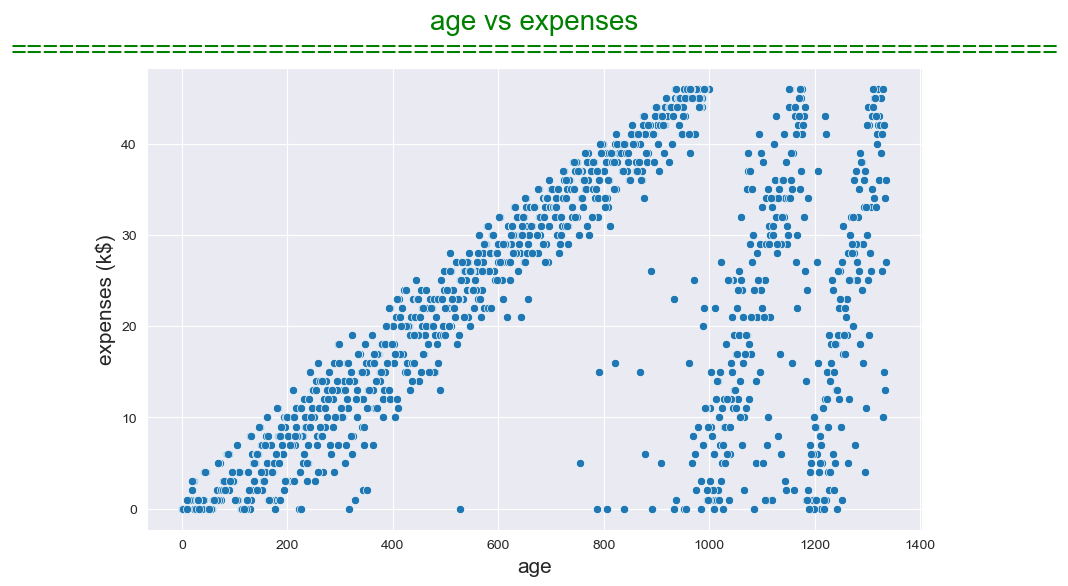

In [19]:
# Age VS expenses

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=auto, x="expenses", y= "age")
plt.title("age vs expenses\n=================================================================", fontsize=20, color="green")
plt.xlabel("age", fontsize=15)
plt.ylabel("expenses (k$)", fontsize=15)
plt.show()

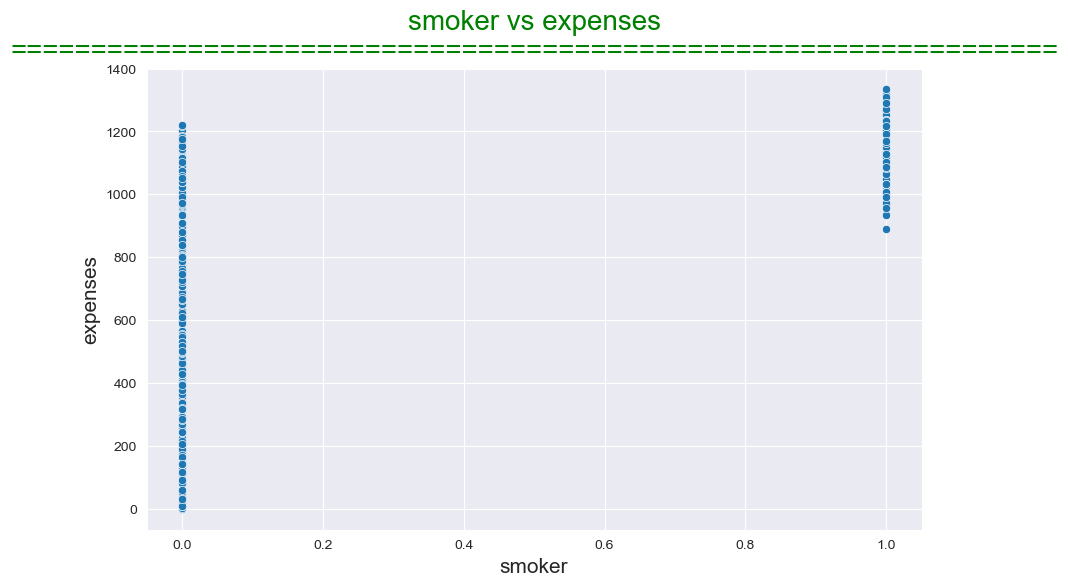

In [22]:
# smoker VS expenses

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.scatterplot(data=auto, x="smoker", y= "expenses")
plt.title("smoker vs expenses\n=================================================================", fontsize=20, color="green")
plt.xlabel("smoker", fontsize=15)
plt.ylabel("expenses", fontsize=15)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
df_scaled = auto[["age","smoker","expenses"]]

# Class instance
scaler = StandardScaler()

# Fit_transform
df_scaled_fit = scaler.fit_transform(df_scaled)
df_scaled_fit

array([[-1.43876426,  1.97058663,  0.87383048],
       [-1.50996545, -0.5074631 , -1.58089056],
       [-0.79795355, -0.5074631 , -0.93613788],
       ...,
       [-1.50996545, -0.5074631 , -1.64562476],
       [-1.29636188, -0.5074631 , -1.49285204],
       [ 1.55168573,  1.97058663,  1.3036656 ]])

In [31]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, max_iter=50)
kmeans.fit(df_scaled_fit)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



KMeans(max_iter=50, n_clusters=6)

In [32]:
kmeans.labels_

array([0, 2, 2, ..., 2, 2, 3])

In [33]:
auto["category"] = kmeans.labels_

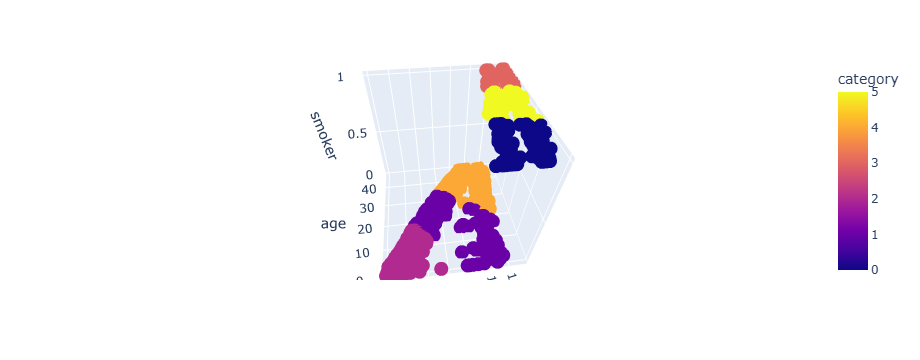

In [38]:
import plotly.express as px
fig = px.scatter_3d(auto, x='expenses',y='age', z='smoker',
              color='category')
fig.show()

In [39]:
# Calculating sum of squared distance

ssd = []

for num_clusters in range(1,11):
    kmeans1 = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans1.fit(df_scaled_fit)

    ssd.append(kmeans1.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

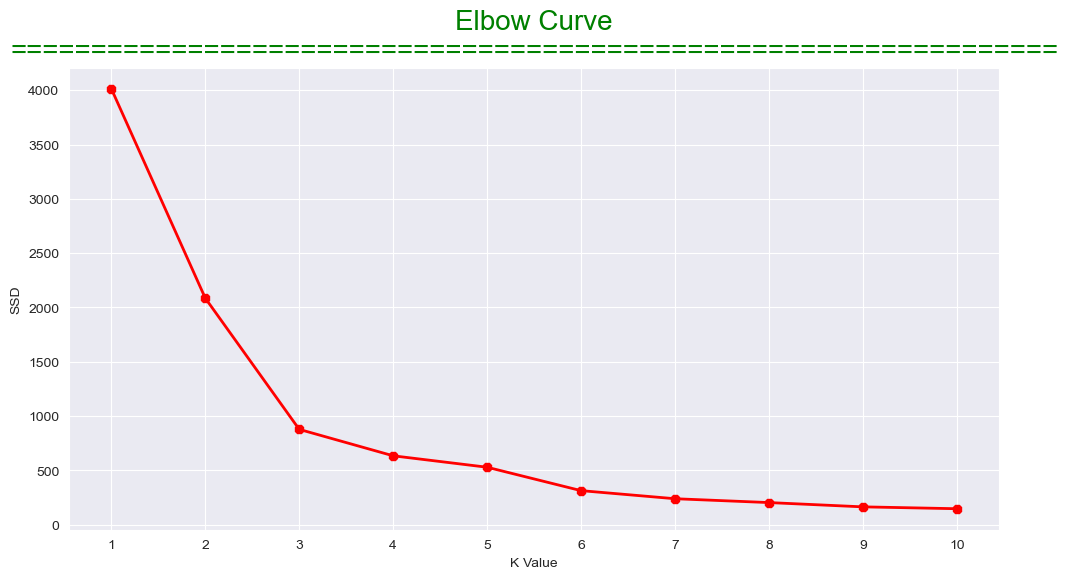

In [40]:
# Elbow curve

plt.figure(figsize=(12,6))

plt.plot(range(1,11), ssd, linewidth=2, color="red", marker ="8")
plt.title("Elbow Curve\n=================================================================", fontsize=20, color="green")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("SSD")

plt.show()